In [1]:
import os
from funman.utils.run import Runner
from pathlib import Path
import json
import logging
from IPython.display import Image, display

# remove matplotlib debugging
logging.getLogger('matplotlib.font_manager').disabled = True
logging.getLogger('matplotlib.pyplot').disabled = True
logging.getLogger('funman.translate.translate').setLevel(logging.DEBUG)

# %matplotlib inline
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

this_dir = Path.cwd()

RESOURCES = os.path.join(
    this_dir, "../resources"
)
AMR_EXAMPLES_DIR = os.path.join(RESOURCES, "amr")
AMR_PETRI_DIR = os.path.join(AMR_EXAMPLES_DIR, "petrinet", "amr-examples")
MIRA_PETRI_DIR = os.path.join(AMR_EXAMPLES_DIR, "petrinet", "mira")

out_dir = os.path.join(
    this_dir, "out"
)
if not os.path.exists(out_dir):
        os.mkdir(out_dir)


In [2]:
base_model = os.path.join(MIRA_PETRI_DIR, "models", "eval_scenario1_base_simple.json")
base_request = {
  "query": {},
  "parameters": [
      
  ],
  "structure_parameters": [
    {
      "name": "num_steps",
      "lb": 20,
      "ub": 20,
      "label": "all"
    },
    {
      "name": "step_size",
      "lb": 1,
      "ub": 1,
      "label": "all"
    }
  ],
  "config": {}
}
parameters = ["N", "beta", "r_E_to_I", "p_I_to_R", "r_I_to_R", "p_I_to_H", "r_I_to_H", "p_H_to_R",  "r_H_to_R", "p_H_to_D", "r_H_to_D"]


INFO:funman.server.worker:FunmanWorker running...
INFO:funman.server.worker:Starting work on: ff9bdb5a-9726-417a-8ffb-f62aeb4c80da


INFO:funman.server.worker:Completed work on: ff9bdb5a-9726-417a-8ffb-f62aeb4c80da
INFO:funman.server.worker:FunmanWorker exiting...


<Axes: xlabel='time'>

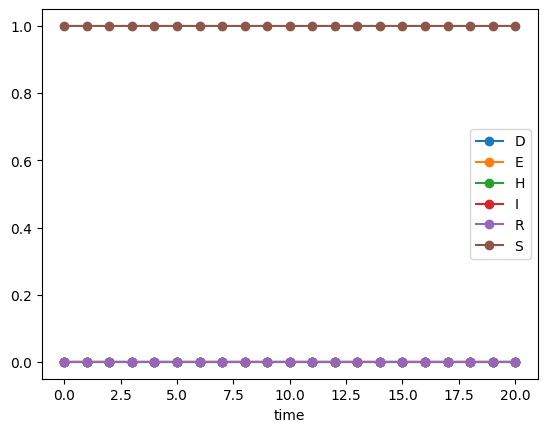

In [5]:
# Is the base model consistent, given the default parameter values?

model = base_model
request = base_request

# modify config to enable extraction of the variables describing the true point
# request["config"]["substitute_subformulas"]= False
# request["config"]["profile"] = True

result = Runner().run(model, request, case_out_dir=out_dir)
points = result.parameter_space.true_points[0:1]
result.plot(points, variables=["D", "E", "H", "I", "R", "S"])

In [6]:
point_parameters = [ {param: p.values[param] for param in parameters} for p in points]
point_parameters

[{'N': 19340000.0,
  'beta': 0.4,
  'r_E_to_I': 0.2,
  'p_I_to_R': 0.8,
  'r_I_to_R': 0.07,
  'p_I_to_H': 0.2,
  'r_I_to_H': 0.1,
  'p_H_to_R': 0.88,
  'r_H_to_R': 0.1,
  'p_H_to_D': 0.12000000000000001,
  'r_H_to_D': 0.1}]

In [ ]:
os.system(f"gprof2dot -f pstats {this_dir}/profile.stats | dot -Tpng -o profile.png")
display(Image(filename='profile.png'))

INFO:funman.server.worker:FunmanWorker running...
INFO:funman.server.worker:Starting work on: f48fd935-1054-4ce9-8bfe-ac82bc76c639
INFO:funman.server.worker:Completed work on: f48fd935-1054-4ce9-8bfe-ac82bc76c639
INFO:funman.server.worker:FunmanWorker exiting...
[{'N': 19340000.0, 'beta': 0.5, 'r_E_to_I': 0.5, 'p_I_to_R': 0.5, 'r_I_to_R': 0.5, 'p_I_to_H': 0.5, 'r_I_to_H': 0.5, 'p_H_to_R': 0.5, 'r_H_to_R': 0.5, 'p_H_to_D': 0.5, 'r_H_to_D': 0.5}]


<Axes: xlabel='time'>

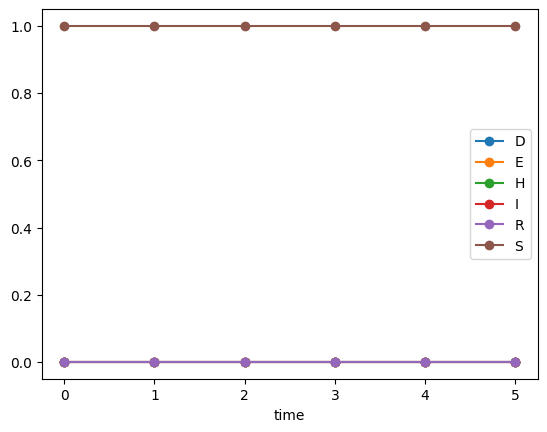

In [12]:
# Relax the parameters to see if an alternative parameterization would work.
model = base_model
request = base_request.copy()
request["parameters"] = [
    {
        "name": param,
        "label": "any",
        "lb": 0.0,
        "ub": 1.0
    } for param in parameters if param != "N"
]
request["config"]["profile"] = True
# request["config"]["substitute_subformulas"] = True
# request["config"]["simplify_query"] = True

# Restrict attention to area where the important behavior occurs
num_steps_param = next(p for p in request["structure_parameters"] if p["name"] == "num_steps")
num_steps_param["lb"]= 5
num_steps_param["ub"]= 5

result = Runner().run(model, request, case_out_dir=out_dir)
points = result.parameter_space.true_points[0:1]
point_parameters = [ {param: p.values[param] for param in parameters} for p in points]
print(point_parameters)

result.plot(points, variables=["D", "E", "H", "I", "R", "S"])


In [ ]:

os.system(f"gprof2dot -f pstats {this_dir}/profile.stats | dot -Tpng -o profile.png")
display(Image(filename='profile.png'))